# importing necessary liabrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the data set

In [2]:
df=pd.read_csv('Default_Fin.csv')
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [3]:
df['Defaulted?'].value_counts()

Defaulted?
0    9667
1     333
Name: count, dtype: int64

# check the shape of data set

In [4]:
df.shape

(10000, 5)

# Handling null value

In [5]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

# Fetch the duplicate value

In [6]:
df.duplicated().sum()

0

# drop 'index' column

In [7]:
df.drop('Index',axis=1,inplace=True)

In [8]:
df.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

# check the data type

In [9]:
df.dtypes

Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

# Data description

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


# statistical behaviour

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employed,10000.0,0.705600,0.455795,0.00,0.00,1.00,1.00,1.00
Bank Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76
Defaulted?,10000.0,0.033300,0.179428,0.00,0.00,0.00,0.00,1.00


# performing some EDA

In [12]:
corr=df.corr()
corr

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.035420,0.350119,-0.019871,1.000000


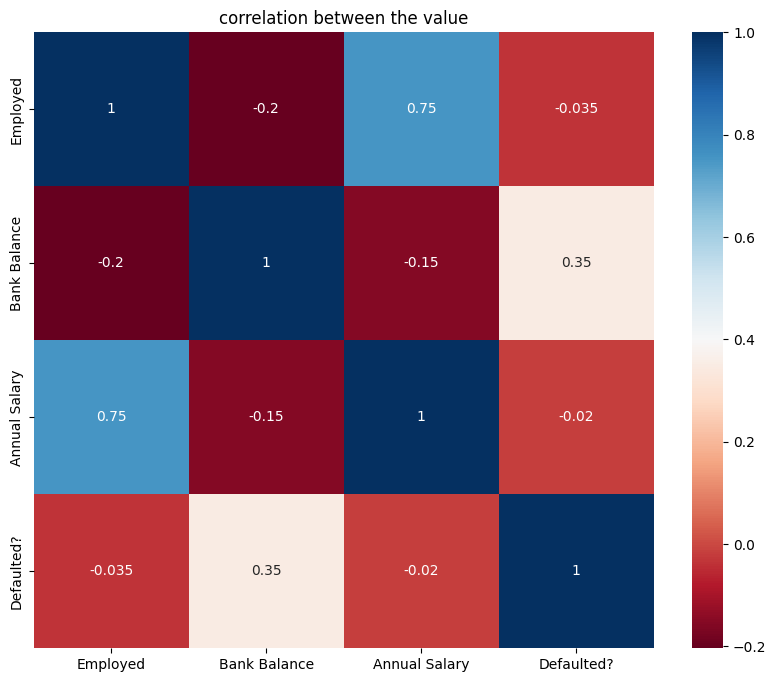

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True,cmap='RdBu')
plt.title('correlation between the value')
plt.show()

# outliers treatment

In [14]:
col=['Bank Balance', 'Annual Salary', 'Defaulted?']
a=df[col].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Bank Balance,10000.0,10024.498524,5804.579486,0.00,9883.62,19991.496,20692.5312,21519.4836,22407.7776,24101.6676,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,414631.74,656134.650,670258.1808,687074.5464,707909.5968,739880.8800,882650.76
Defaulted?,10000.0,0.033300,0.179428,0.00,0.00,0.000,0.0000,1.0000,1.0000,1.0000,1.00


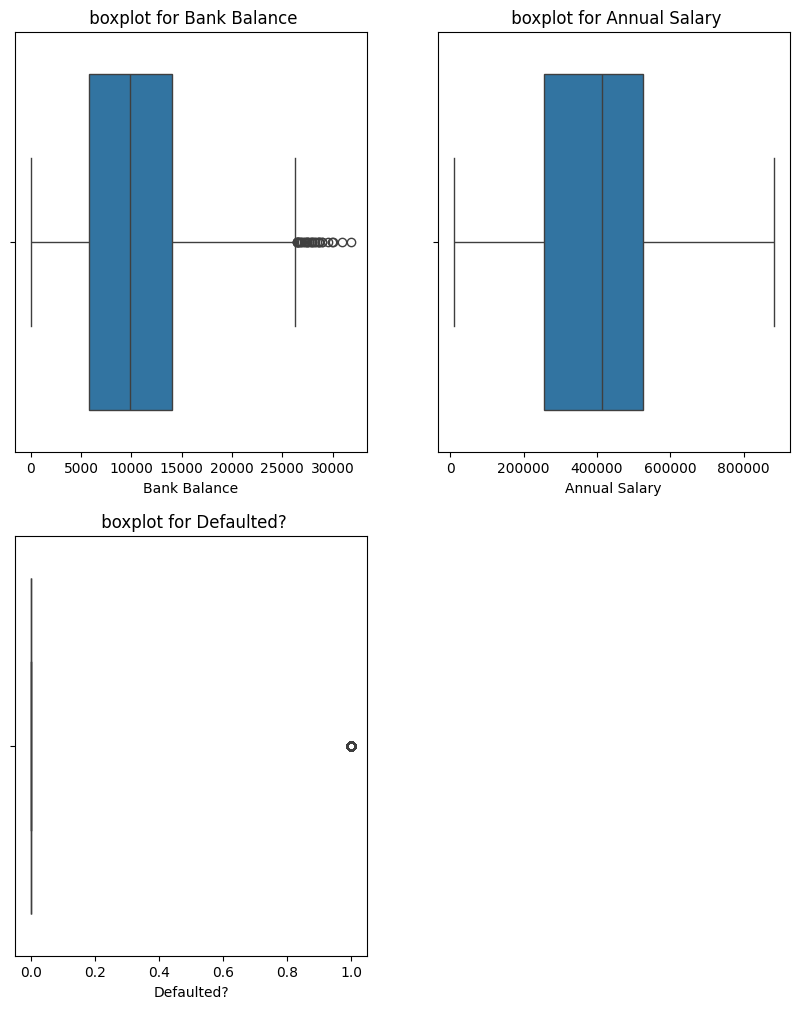

In [15]:
plt.figure(figsize=(10,12))
for i in range (len(col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col[i]])
    plt.title(f' boxplot for {col[i]}')
plt.show()
    

# outliers capping

In [16]:
print(df[df['Bank Balance']>24101.6676].shape)

(100, 4)


In [17]:
df['Bank Balance']=np.where(df['Bank Balance']>24101.6676,24101.6676,df['Bank Balance'])

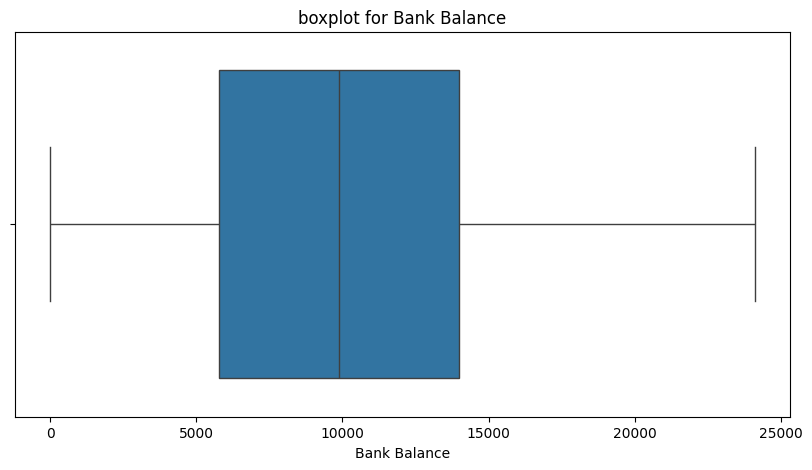

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Bank Balance'])
plt.title('boxplot for Bank Balance')
plt.show()

# seperate independent variable and dependent variable

In [19]:
x=df.drop('Defaulted?',axis=1)
y=df['Defaulted?']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(10000, 3)
(10000,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# split the data into training and testing data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2022,test_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 3)
(8000, 3)
(2000,)
(8000,)


# create a function to evaluate model

In [24]:
from sklearn.metrics import *

In [25]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    test_mae=mean_absolute_error(y_test,ypred)
    test_mse=mean_squared_error(y_test,ypred)
    test_rmse=np.sqrt(test_mse)
    Train_score=model.score(x_train,y_train)
    Test_score=model.score(x_test,y_test)
    res=pd.DataFrame({'Train score':Train_score,'Test score':Test_score,'test_mae':test_mae,'test_mse':test_mse,'test_rmse':test_rmse},index=[mname])
    return res,ypred

# apply ml model

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression

# DT model

In [26]:
dt=DecisionTreeRegressor(max_depth=10,min_samples_split=12)
dt_res,ypred_dt=eval_model(dt,x_train,x_test,y_train,y_test,'DecisionTree Reg')
dt_res

,Train score,Test score,test_mae,test_mse,test_rmse
DecisionTree Reg,0.68246,0.060315,0.039492,0.030972,0.17599


# RF model

In [27]:
rf=RandomForestRegressor(n_estimators=80,max_depth=10,min_samples_split=12)
rf_res,ypred_rf=eval_model(rf,x_train,x_test,y_train,y_test,'RandomForest Reg')
rf_res

,Train score,Test score,test_mae,test_mse,test_rmse
RandomForest Reg,0.639711,0.284122,0.042189,0.023596,0.153609


# LR model

In [29]:
lr=LinearRegression()
lr_res,ypred_lr=eval_model(lr,x_train,x_test,y_train,y_test,'Linear Reg')
lr_res

,Train score,Test score,test_mae,test_mse,test_rmse
Linear Reg,0.098677,0.116995,0.074374,0.029104,0.1706


# Adaboost model

In [30]:
ad=AdaBoostRegressor(n_estimators=80,estimator=dt)
ad_res,ypred_ad=eval_model(ad,x_train,x_test,y_train,y_test,'AdaBoost Reg')
ad_res

,Train score,Test score,test_mae,test_mse,test_rmse
AdaBoost Reg,0.973949,0.130813,0.044618,0.028649,0.16926


# Save the Model

In [31]:
import pickle

In [32]:
pickle.dump(lr,open('Loan_default_lr_pred_model.pkl','wb'))
pickle.dump(dt,open('Loan_default_dt_pred_model.pkl','wb'))
pickle.dump(rf,open('Loan_default_rf_pred_model.pkl','wb'))
pickle.dump(ad,open('Loan_default_ad_pred_model.pkl','wb'))